In [1]:
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
import config as cfg
import csv
import time
import math
import random
import cv2
from datetime import datetime
from tensorflow.keras import backend as K
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.6.8 (default, Oct  7 2019, 12:59:55) 
[GCC 8.3.0]
TensorFlow version :  1.15.0
Keras version :  2.3.1


Using TensorFlow backend.


In [2]:
# 데이터 불러오기

xs = []
ys = []

#read data.csv
increased_path = '../dataset/20200512/3-increased'
with open(increased_path + '/data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        # print(row[0], row[1])
        xs.append(increased_path + '/' + row[0])
        ys.append(int(row[1]))

        
increased_path = '../dataset/20200513/3-increased'
with open(increased_path + '/data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        # print(row[0], row[1])
        xs.append(increased_path + '/' + row[0])
        ys.append(int(row[1]))
        
#read data.csv
increased_path = '../dataset/training-data-shortcut/3-increased'
with open(increased_path + '/data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        # print(row[0], row[1])
        xs.append(increased_path + '/' + row[0])
        ys.append(int(row[1]))

        
increased_path = '../dataset/training-data-stop/3-increased'
with open(increased_path + '/data.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        # print(row[0], row[1])
        xs.append(increased_path + '/' + row[0])
        ys.append(int(row[1]))


#get number of images
num_images = len(xs)
num_train_images = math.floor(num_images * 0.8)
num_val_images = math.floor(num_images * 0.1)
num_test_images = num_images - num_train_images - num_val_images

print('# images : ', num_images)
print('# training images : ', num_train_images)
print('# validation images : ', num_val_images)
print('# test images : ', num_test_images)


#shuffle list of images
c = list(zip(xs, ys))
random.seed(datetime.now())
random.shuffle(c)
random.seed(random.random())
random.shuffle(c)
xs, ys = zip(*c)

# images :  40251
# training images :  32200
# validation images :  4025
# test images :  4026


In [3]:
# 파일명을 이용해서 실제 이미지 불러오기
x_train_images = []
y_train_labels = []
x_validation_images = []
y_validation_labels = []
x_test_images = []
y_test_labels = []

for i in range(num_images):
    filepath = xs[i]
    if i < num_train_images:  # training data
        colorIMG = cv2.imread(filepath)[cfg.modelheight:]
        grayIMG = cv2.cvtColor(colorIMG, cv2.COLOR_BGR2GRAY)
        x_train_images.append(cv2.resize(grayIMG, dsize=(cfg.final_width, cfg.final_height)) / 255.0)
        y_train_labels.append([ys[i]])
    elif (i >= num_train_images) and (i < num_train_images + num_val_images):  # validation data
        colorIMG = cv2.imread(filepath)[cfg.modelheight:]
        grayIMG = cv2.cvtColor(colorIMG, cv2.COLOR_BGR2GRAY)
        x_validation_images.append(cv2.resize(grayIMG, dsize=(cfg.final_width, cfg.final_height)) / 255.0)
        y_validation_labels.append([ys[i]])
    else:  # test data
        colorIMG = cv2.imread(filepath)[cfg.modelheight:]
        grayIMG = cv2.cvtColor(colorIMG, cv2.COLOR_BGR2GRAY)
        x_test_images.append(cv2.resize(grayIMG, dsize=(cfg.final_width, cfg.final_height)) / 255.0)
        y_test_labels.append([ys[i]])

(32200, 66, 100)
(32200, 66, 100)


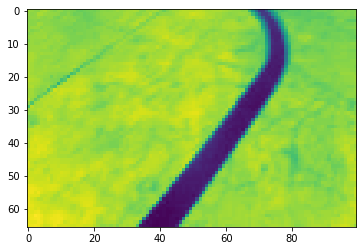

(4025, 66, 100)


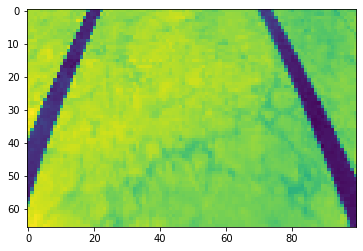

(4026, 66, 100)


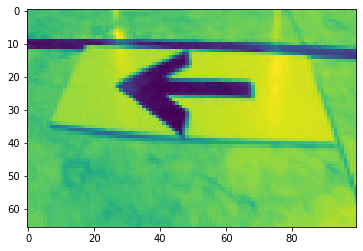

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

num_classes = cfg.NUM_KEYS

#x_train_images = tf.reshape(x_train_images, [len(x_train_images), cfg.final_height, cfg.final_width, 1])
x_train_images = np.array(x_train_images)
print(x_train_images.shape)
x_train_images.reshape(x_train_images.shape[0], cfg.final_height, cfg.final_width, 1)
print(x_train_images.shape)
plt.imshow(x_train_images[0])
plt.show()

#x_validation_images = tf.reshape(x_validation_images, [len(x_validation_images), cfg.final_height, cfg.final_width, 1])
x_validation_images = np.array(x_validation_images)
x_validation_images.reshape(x_validation_images.shape[0], cfg.final_height, cfg.final_width, 1)
print(x_validation_images.shape)
plt.imshow(x_validation_images[0])
plt.show()

#x_test_images = tf.reshape(x_test_images, [len(x_test_images), cfg.final_height, cfg.final_width, 1])
x_test_images = np.array(x_test_images)
x_test_images.reshape(x_test_images.shape[0], cfg.final_height, cfg.final_width, 1)
print(x_test_images.shape)
plt.imshow(x_test_images[0])
plt.show()

y_train_labels = keras.utils.to_categorical(y_train_labels, num_classes)
y_validation_labels = keras.utils.to_categorical(y_validation_labels, num_classes)
y_test_labels = keras.utils.to_categorical(y_test_labels, num_classes)

In [5]:
#from matplotlib import pyplot as plt
#%matplotlib inline

# 마지막에 color_channel 차원이 추가 되어야 함

print('Before : ', x_train_images.shape)
x_train_images = np.expand_dims(x_train_images, axis=-1)
print('After : ', x_train_images.shape)

print('Before : ', x_validation_images.shape)
x_validation_images = np.expand_dims(x_validation_images, axis=-1)
print('After : ', x_validation_images.shape)

print('Before : ', x_test_images.shape)
x_test_images = np.expand_dims(x_test_images, axis=-1)
print('After : ', x_test_images.shape)

Before :  (32200, 66, 100)
After :  (32200, 66, 100, 1)
Before :  (4025, 66, 100)
After :  (4025, 66, 100, 1)
Before :  (4026, 66, 100)
After :  (4026, 66, 100, 1)


In [6]:
print(num_images)  # 전체 데이터 수
print()

print(x_train_images.shape)
print(x_validation_images.shape)
print(x_test_images.shape)
print()

print(len(x_train_images))  # 학습용 이미지 수
print(len(y_train_labels))  # 학습용 레이블 수
print(len(x_validation_images))  # val 이미지 수
print(len(y_validation_labels))  # val 레이블 수
print(len(x_test_images))  # 테스트용 이미지 수
print(len(y_test_labels))  # 테스트용 레이블 수
print()

print(x_train_images[0].shape)  # 학습용 이미지 한개의 차원
print(y_train_labels[0].shape)  # 학습용 레이블 한개의 차원
print(x_validation_images[0].shape)  # val 이미지 한개의 차원
print(y_validation_labels[0].shape)  # val 레이블 한개의 차원
print(x_test_images[0].shape)  # 테스트용 이미지 한개의 차원
print(y_test_labels[0].shape)  # 테스트용 레이블 한개의 차원

#input_shape = (cfg.final_height, cfg.final_width, 1)
color_channels = 1
input_shape = (cfg.final_height, cfg.final_width, color_channels)

if K.image_data_format() == "channels_first":
    assert False  # input_shape = (color_channels, height, width)

40251

(32200, 66, 100, 1)
(4025, 66, 100, 1)
(4026, 66, 100, 1)

32200
32200
4025
4025
4026
4026

(66, 100, 1)
(6,)
(66, 100, 1)
(6,)
(66, 100, 1)
(6,)


In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 66, 100, 32)       832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 50, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 25, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 25, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
______________________________________

In [8]:
batch_size = 128
#epochs = 10
epochs = 30

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train_images, y_train_labels,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_validation_images, y_validation_labels))


Train on 32200 samples, validate on 4025 samples
Epoch 1/30
32200/32200 [==============================] - 9s 286us/step - loss: 0.5575 - accuracy: 0.8181 - val_loss: 0.2399 - val_accuracy: 0.9073
Epoch 2/30
32200/32200 [==============================] - 7s 227us/step - loss: 0.2438 - accuracy: 0.9071 - val_loss: 0.1958 - val_accuracy: 0.9230
Epoch 3/30
32200/32200 [==============================] - 7s 229us/step - loss: 0.2065 - accuracy: 0.9193 - val_loss: 0.1873 - val_accuracy: 0.9210
Epoch 4/30
32200/32200 [==============================] - 7s 226us/step - loss: 0.1842 - accuracy: 0.9271 - val_loss: 0.1715 - val_accuracy: 0.9314
Epoch 5/30
32200/32200 [==============================] - 7s 223us/step - loss: 0.1673 - accuracy: 0.9321 - val_loss: 0.1560 - val_accuracy: 0.9347
Epoch 6/30
32200/32200 [==============================] - 7s 227us/step - loss: 0.1528 - accuracy: 0.9377 - val_loss: 0.1482 - val_accuracy: 0.9419
Epoch 7/30
32200/32200 [==============================] - 7s 2

In [9]:
score = model.evaluate(x_test_images, y_test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12902044094136653
Test accuracy: 0.9734227657318115


In [ ]:
# save model : https://www.tensorflow.org/tutorials/keras/save_and_load

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('save/my_model.h5')

In [ ]:
# THE END